In [0]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

Using TensorFlow backend.


In [0]:
import pandas as pd

column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
data = pd.DataFrame(data=train_data, columns=column_names)
data['MEDV'] = train_targets

In [0]:
data.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72,15.2
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11,42.3
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26,50.0
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01,21.1
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65,17.7


In [0]:
np.shape(data)

(404, 14)

In [0]:
# simple stats of the data
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.745111,11.480198,11.104431,0.061881,0.557356,6.267082,69.010644,3.740271,9.440594,405.898515,18.475990,354.783168,12.740817,22.395050
std,9.240734,23.767711,6.811308,0.241238,0.117293,0.709788,27.940665,2.030215,8.698360,166.374543,2.200382,94.111148,7.254545,9.210442
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,188.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081437,0.000000,5.130000,0.000000,0.453000,5.874750,45.475000,2.077100,4.000000,279.000000,17.225000,374.672500,6.890000,16.675000
50%,0.268880,0.000000,9.690000,0.000000,0.538000,6.198500,78.500000,3.142300,5.000000,330.000000,19.100000,391.250000,11.395000,20.750000
75%,3.674808,12.500000,18.100000,0.000000,0.631000,6.609000,94.100000,5.118000,24.000000,666.000000,20.200000,396.157500,17.092500,24.800000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


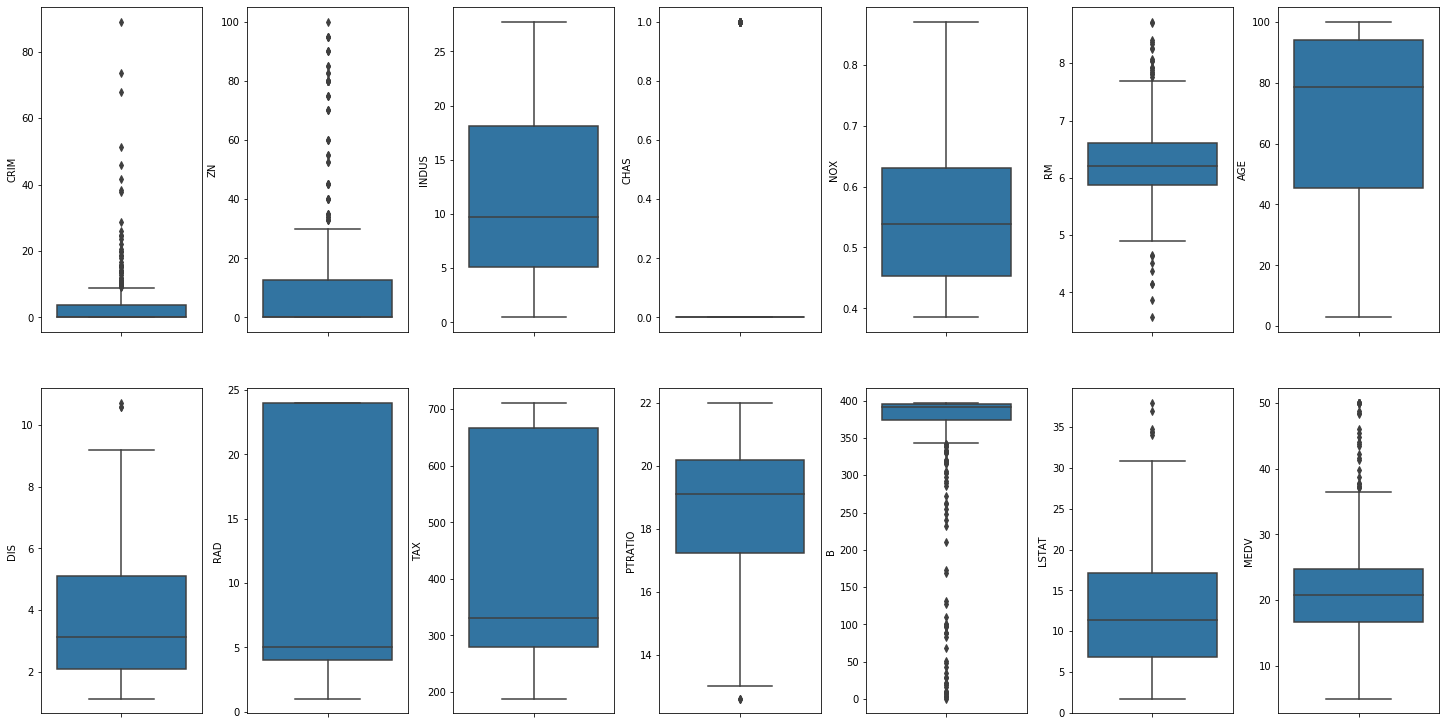

In [0]:
# plot the boxplots for each column
import seaborn as sns
from scipy import stats

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k, v in data.items():
  sns.boxplot(y=k, data=data, ax=axs[index])
  index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [0]:
# check percentage of outliners
for col_name, val in data.items():
  q1, q3, *_ = val.quantile([0.25, 0.75])  # unpack list
  irq = q3 - q1
  v_col = val[(val <= q1 - 1.5*irq)|(val >= q3 + 1.5*irq)]
  perc = np.shape(v_col)[0] *100.0/np.shape(data)[0]
  print("Column %s outliners = %.4f%%" % (col_name, perc))  

Column CRIM outliners = 12.3762%
Column ZN outliners = 13.6139%
Column INDUS outliners = 0.0000%
Column CHAS outliners = 100.0000%
Column NOX outliners = 0.0000%
Column RM outliners = 6.1881%
Column AGE outliners = 0.0000%
Column DIS outliners = 0.7426%
Column RAD outliners = 0.0000%
Column TAX outliners = 0.0000%
Column PTRATIO outliners = 0.7426%
Column B outliners = 15.5941%
Column LSTAT outliners = 1.4851%
Column MEDV outliners = 7.9208%


In [0]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [0]:
# remove MEDV outliners (MEDV >= 50.0)
data = data[~(data['MEDV'] >= 50.0)]
print(np.shape(data))
data.describe()

(391, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000
mean,3.765315,11.132992,11.054808,0.051151,0.556969,6.230402,68.687724,3.778398,9.352941,404.593350,18.532225,353.941918,13.021535,21.477238
std,9.374546,23.122560,6.770687,0.220588,0.117995,0.661785,27.900660,2.029306,8.655411,165.539416,2.152240,95.520899,7.194442,7.836729
min,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,2.900000,1.137000,1.000000,188.000000,12.600000,0.320000,1.980000,5.000000
25%,0.081005,0.000000,5.160000,0.000000,0.453000,5.871500,45.350000,2.111400,4.000000,280.000000,17.400000,374.710000,7.280000,16.450000
50%,0.259150,0.000000,8.560000,0.000000,0.538000,6.174000,77.300000,3.215700,5.000000,330.000000,19.100000,391.450000,11.980000,20.600000
75%,3.428030,12.500000,18.100000,0.000000,0.639000,6.566000,94.050000,5.164950,24.000000,666.000000,20.200000,396.260000,17.155000,24.400000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.398000,100.000000,10.710300,24.000000,711.000000,22.000000,396.900000,37.970000,48.800000


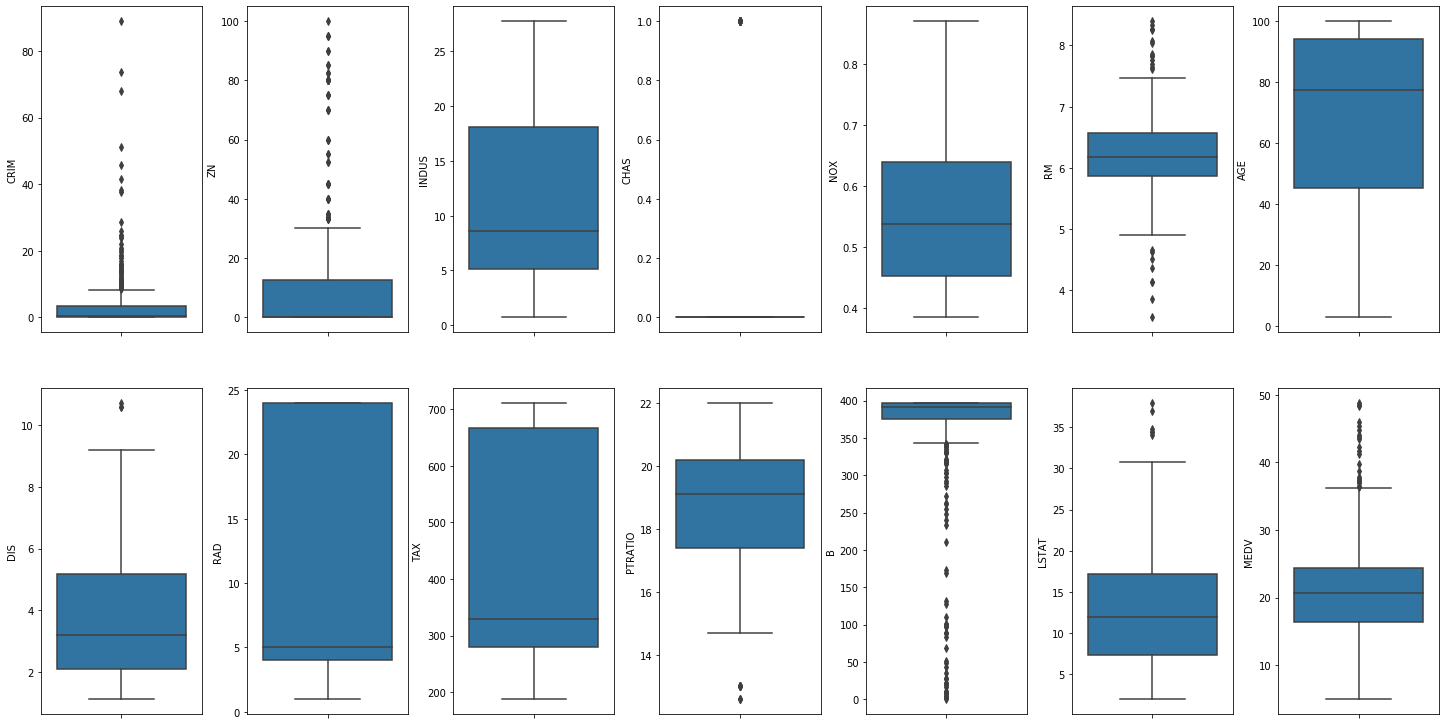

In [0]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k, v in data.items():
  sns.boxplot(y=k, data=data, ax=axs[index])
  index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

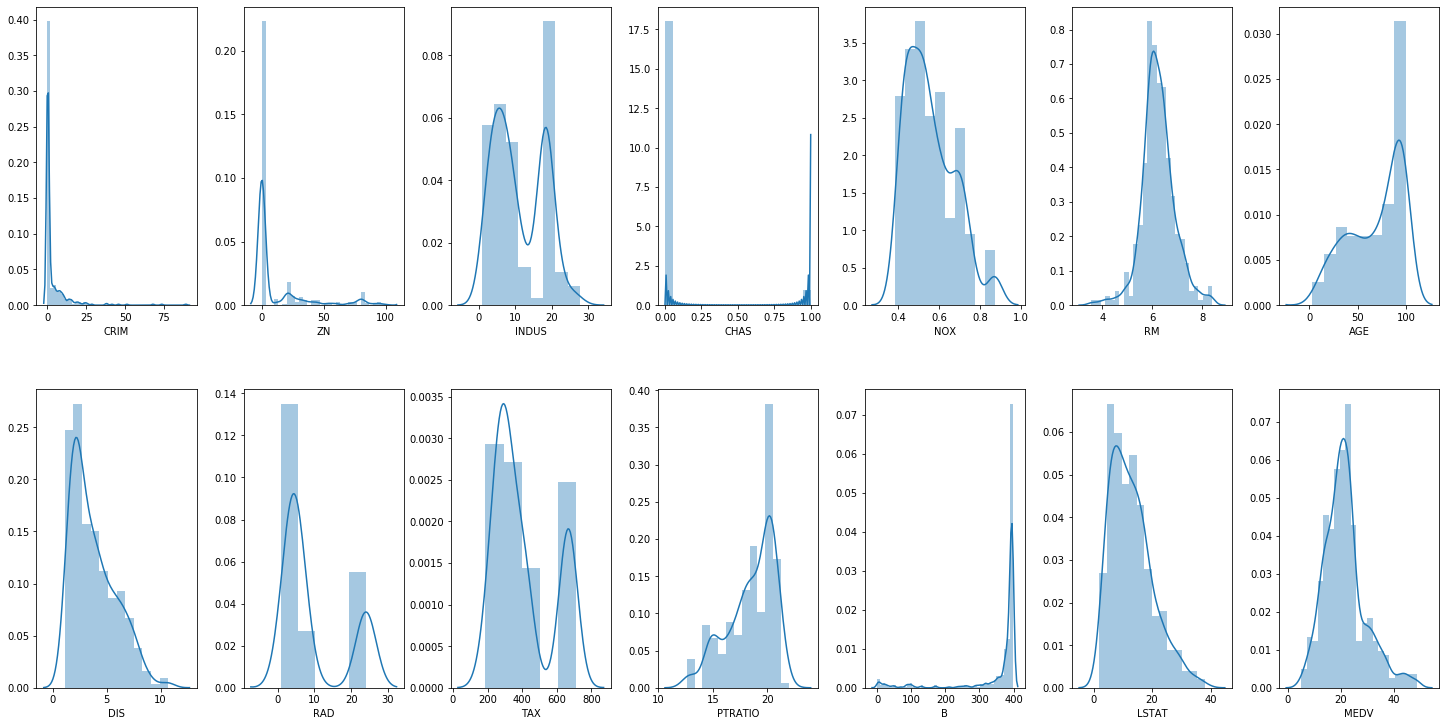

In [0]:
# check distribution of data
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k, v in data.items():
  sns.distplot(v, ax = axs[index])
  index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)


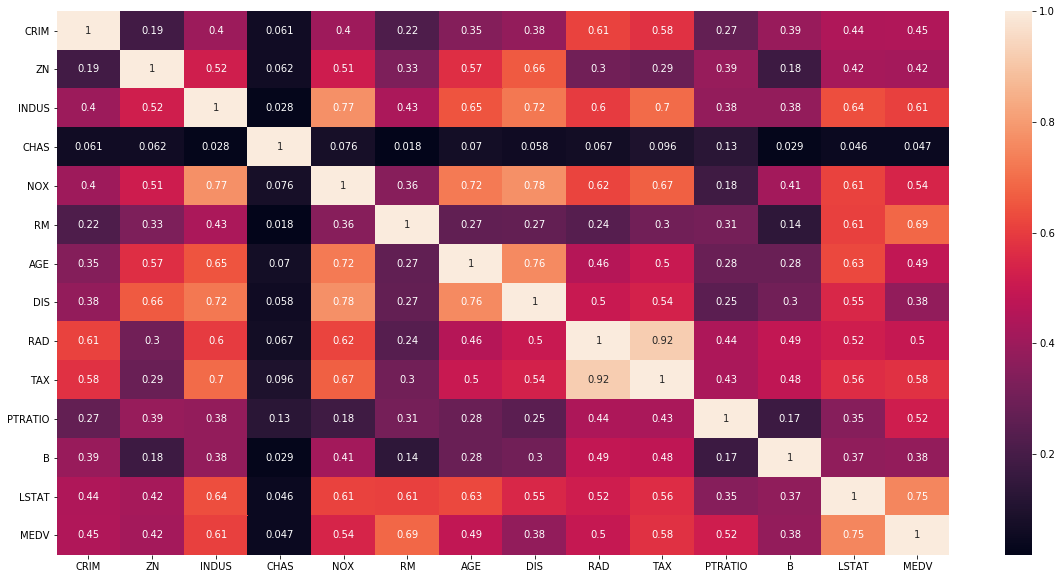

In [0]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr().abs(), annot=True)

In [0]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
column_sels = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']
x = data.loc[:, column_sels]
y = data['MEDV']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)
print(x.head(5))

      LSTAT     INDUS       NOX  ...       TAX       DIS       AGE
0  0.465129  0.274074  0.314815  ...  0.227533  0.296648  0.914521
1  0.031398  0.047778  0.061728  ...  0.305927  0.536179  0.131823
2  0.167547  0.164815  0.267490  ...  0.068834  0.506440  0.325438
3  0.352042  0.642963  0.674897  ...  0.913958  0.149384  0.880536
4  0.271186  0.245926  0.222222  ...  0.189293  0.374385  0.735324

[5 rows x 8 columns]


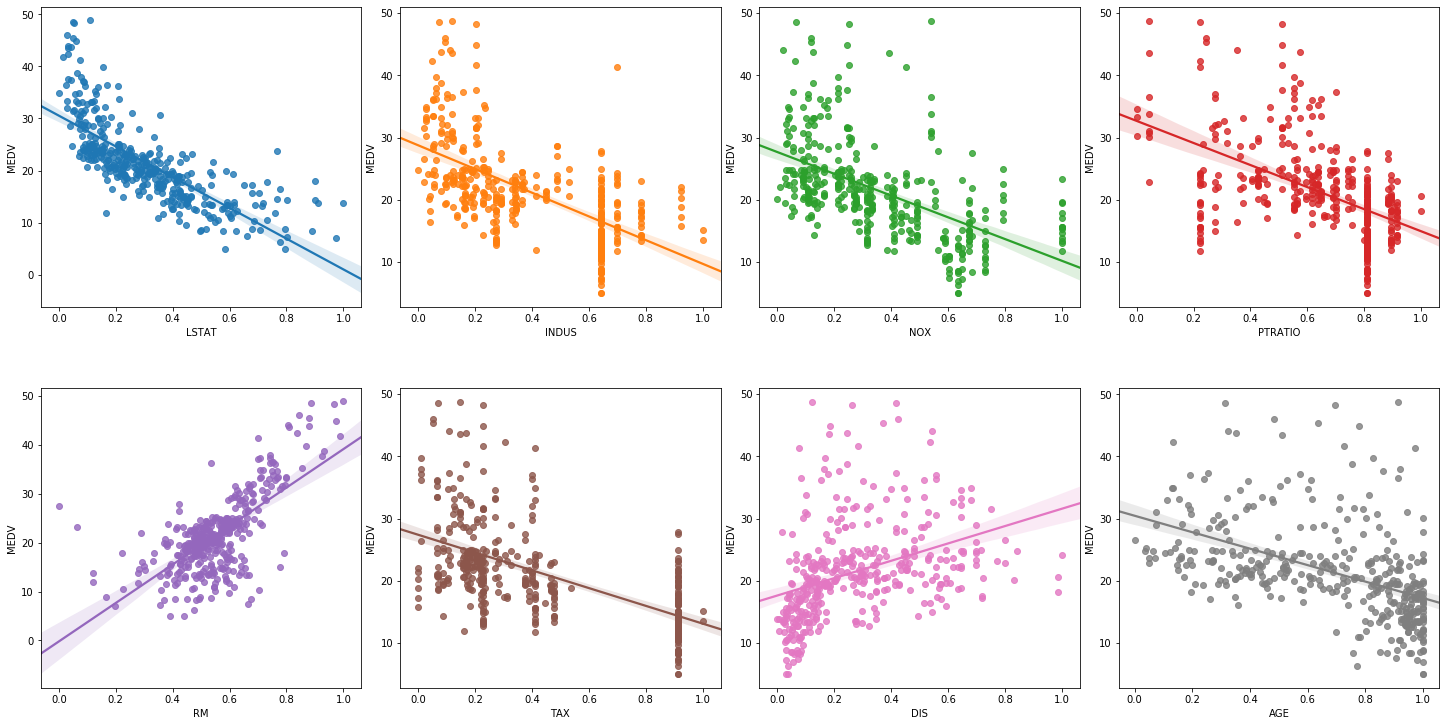

In [0]:
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20,10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
  sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [0]:
# remove the skewness of the data through log tranformation
#y = np.log1p(y)
for col in x.columns:
  if np.abs(x[col].skew()) > 0.3:
    x[col] = np.log1p(x[col])

x.describe()

,LSTAT,INDUS,NOX,PTRATIO,RM,TAX,DIS,AGE
count,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000
mean,0.256581,0.307295,0.287734,0.478331,0.551871,0.323183,0.230780,0.501161
std,0.146551,0.180168,0.172653,0.152118,0.136817,0.212647,0.158263,0.184681
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.137378,0.151607,0.130956,0.412532,0.477672,0.162039,0.096930,0.362680
50%,0.245183,0.254355,0.273696,0.525609,0.540211,0.240206,0.196500,0.568842
75%,0.351815,0.496501,0.420383,0.592504,0.621253,0.649173,0.351178,0.662029
max,0.693147,0.693147,0.693147,0.693147,1.000000,0.693147,0.693147,0.693147


In [0]:
y

0      15.2
1      42.3
3      21.1
4      17.7
5      18.5
       ... 
399    19.4
400    25.2
401    19.4
402    19.4
403    29.1
Name: MEDV, Length: 391, dtype: float64

MSE: -15.39867 (+/- 4.13576)
MSE: -15.44779 (+/- 3.89817)
MSE: -8.06334 (+/- 2.36252)
MSE: -7.67999 (+/- 2.30504)
MSE: -12.12030 (+/- 3.90195)
KNN Accuracy: -13.00244 (+/- 3.81415)
MSE: -8.92935 (+/- 3.05104)
['LinearRegression', 'Ridge', 'PolyRidge', 'SVR', 'DecisionTreeRegressor', 'KNeighborsRegressor', 'GradientBoostingRegressor']


0    -7.996432
1    -8.033183
2   -10.609368
3   -16.834473
4   -13.330375
5    -8.974588
6    -8.147757
7   -17.619586
8   -18.143853
9   -11.513339
Name: DecisionTreeRegressor, dtype: float64

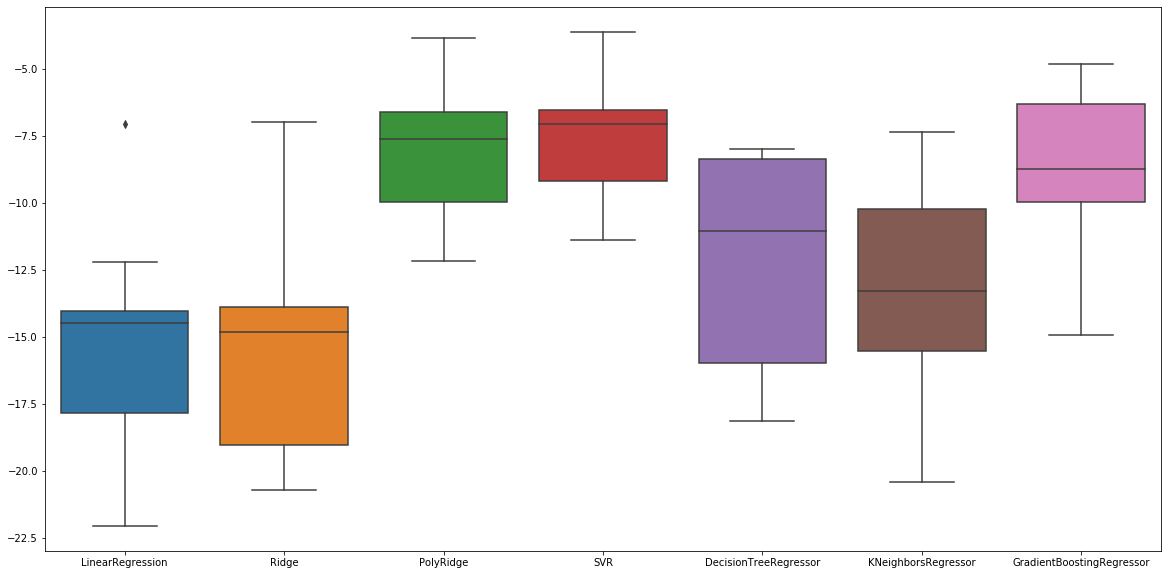

In [0]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


l_regression = linear_model.LinearRegression()
kf = KFold(n_splits=10)
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
scores = cross_val_score(l_regression, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
print("MSE: %0.5f (+/- %0.5f)" % (scores.mean(), scores.std()))

scores_map = {}
scores_map['LinearRegression'] = scores
l_ridge = linear_model.Ridge()
scores = cross_val_score(l_ridge, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
scores_map['Ridge'] = scores
print("MSE: %0.5f (+/- %0.5f)" % (scores.mean(), scores.std()))

# Lets try polinomial regression with L2 with degree for the best fit
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
#for degree in range(2, 6):
#    model = make_pipeline(PolynomialFeatures(degree=degree), linear_model.Ridge())
#    scores = cross_val_score(model, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
#    print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))
model = make_pipeline(PolynomialFeatures(degree=3), linear_model.Ridge())
scores = cross_val_score(model, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
scores_map['PolyRidge'] = scores
print("MSE: %0.5f (+/- %0.5f)" % (scores.mean(), scores.std()))

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
#grid_sv = GridSearchCV(svr_rbf, cv=kf, param_grid={"C": [1e0, 1e1, 1e2, 1e3], "gamma": np.logspace(-2, 2, 5)}, scoring='neg_mean_squared_error')
#grid_sv.fit(x_scaled, y)
#print("Best classifier :", grid_sv.best_estimator_)
scores = cross_val_score(svr_rbf, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
scores_map['SVR'] = scores
print("MSE: %0.5f (+/- %0.5f)" % (scores.mean(), scores.std()))


from sklearn.tree import DecisionTreeRegressor

desc_tr = DecisionTreeRegressor(max_depth=5)
#grid_sv = GridSearchCV(desc_tr, cv=kf, param_grid={"max_depth" : [1, 2, 3, 4, 5, 6, 7]}, scoring='neg_mean_squared_error')
#grid_sv.fit(x_scaled, y)
#print("Best classifier :", grid_sv.best_estimator_)
scores = cross_val_score(desc_tr, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
scores_map['DecisionTreeRegressor'] = scores
print("MSE: %0.5f (+/- %0.5f)" % (scores.mean(), scores.std()))

from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=7)
scores = cross_val_score(knn, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
scores_map['KNeighborsRegressor'] = scores
#grid_sv = GridSearchCV(knn, cv=kf, param_grid={"n_neighbors" : [2, 3, 4, 5, 6, 7]}, scoring='neg_mean_squared_error')
#grid_sv.fit(x_scaled, y)
#print("Best classifier :", grid_sv.best_estimator_)
print("KNN Accuracy: %0.5f (+/- %0.5f)" % (scores.mean(), scores.std()))

from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(alpha=0.9,learning_rate=0.05, max_depth=2, min_samples_leaf=5, min_samples_split=2, n_estimators=100, random_state=30)
#param_grid={'n_estimators':[100, 200], 'learning_rate': [0.1,0.05,0.02], 'max_depth':[2, 4,6], 'min_samples_leaf':[3,5,9]}
#grid_sv = GridSearchCV(gbr, cv=kf, param_grid=param_grid, scoring='neg_mean_squared_error')
#grid_sv.fit(x_scaled, y)
#print("Best classifier :", grid_sv.best_estimator_)
scores = cross_val_score(gbr, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
scores_map['GradientBoostingRegressor'] = scores
print("MSE: %0.5f (+/- %0.5f)" % (scores.mean(), scores.std()))

plt.figure(figsize=(20, 10))
scores_map = pd.DataFrame(scores_map)
sns.boxplot(data=scores_map)
print(list(scores_map.keys()))
scores_map['DecisionTreeRegressor']

